# Mahsa Aghazadeh 20234622

## HSS407/DHS407/DS571 Individual Lab 1
### Basic statistics

- If you collected data (may not be complete) for your final project, feel free to use it.

- If you haven't, let's use our Dune review data for this lab.

In [ ]:
#### Let's load the data.

import pandas as pd
import statsmodels.api as sm
# Load the data
review_score = pd.read_csv("metacritic_quotes.csv")

First, we'll use the data set review_score. This is the data set we compared the sentiment analysis results by dictionary-based and GPT-based methods. 'score' is the review score given by Metacritic authors, 'sentiment' is the sentiment collected from Metacritic.com. 'sentiment by openAI' is the gpt-based sentiment score. 'neg', 'neu', 'pos', and 'compound' are scores given by the dictionary-based method.  

Let's see how the data looks like.

In [ ]:
print(review_score.head())
print(review_score.info())

   Unnamed: 0    type             author         publication  score sentiment  \
0           0  critic       Kevin Harley          Total Film   10.0  positive   
1           1  critic  Clarisse Loughrey     The Independent   10.0  positive   
2           2  critic  Johnny Oleksinski       New York Post   10.0  positive   
3           3  critic     Manohla Dargis  The New York Times   10.0  positive   
4           4  critic          Mike Ryan              Uproxx   10.0  positive   

   sentiment by openAI    neg    neu    pos  compound  \
0                    9  0.000  0.823  0.177    0.4215   
1                    8  0.034  0.899  0.067    0.3626   
2                    9  0.000  0.509  0.491    0.8910   
3                    9  0.000  0.852  0.148    0.3818   
4                    9  0.000  0.708  0.292    0.7650   

                                               quote  
0  Part Two is an inarguable marvel technically, ...  
1  Part Two is as grand as it is intimate, and wh...  
2  Ou

### Question 1
How many observations are in the data? How many variables are in the data? (Ignore the first variable, "Unnamed: 0".) What is the unit of analysis?

In [ ]:
review_score.shape

(391, 12)

In [ ]:
print(f"Number of observations: {review_score.shape[0]}")
print(f"Number of variables: {review_score.shape[1] - 1}")


Number of observations: 391
Number of variables: 11


Unit of analysis = what we are analysing (each observation) \
Since the study is focused on analyzing the sentiment of reviews, the unit of analysis is the reviews.


---

### Question 2
For each variable in the data, explain whether it is a categorical or quantitative variable.


In [ ]:
# unique_values = review_score['type'].unique()
# unique_values = review_score['sentiment'].unique()
# unique_values = review_score['publication'].unique()
# unique_values = review_score['sentiment by openAI'].unique()
# unique_values = review_score['score'].unique()
unique_values = review_score['quote'].unique().shape
print(unique_values)

(388,)


- **type:** Categorical ("critic" or "user")
- **author:** Categorical  (each author can be considered as a category and can be used in analysis like the number of reviews by each author)
- **publication:** Categorical (names of publications)
- **score:** Quantitative --> range: (0,1)
- **sentiment:** Categorical ("positive," "neutral","negative")
- **sentiment by openAI:** Quantitative --> (0,1,...,10)
- **neg:** Quantitative --> range: (0,1)
- **neu:** Quantitative --> range: (0,1)
- **pos:** Quantitative --> range: (0,1)
- **compound:** Quantitative --> range: (-1,1)
-----------------
- **quote:** Categorical
I think it does not fit neatly into neither Categorical nor Quantitative because there are no predefined categories for them. closer to categorical since each quote can be treated as a unique category

  

---



### Question 3
Now choose one quantitative variable from your data. Draw a histogram and check the distribution of it. Describe the shape of your distribution in English sentences. (skewed? modality? etc.)


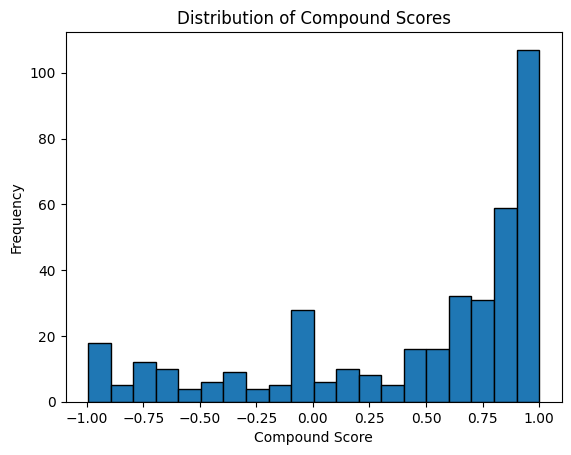

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

compound_data = review_score['compound']
plt.figure()
plt.hist(compound_data, bins=20, edgecolor='black')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


Compound represents the overall sentiment score of a text.
*  A score close to 1 indicates a strongly positive sentiment.
*  A score close to -1 indicates a strongly negative sentiment.
*  A score around 0 indicates a neutral sentiment.


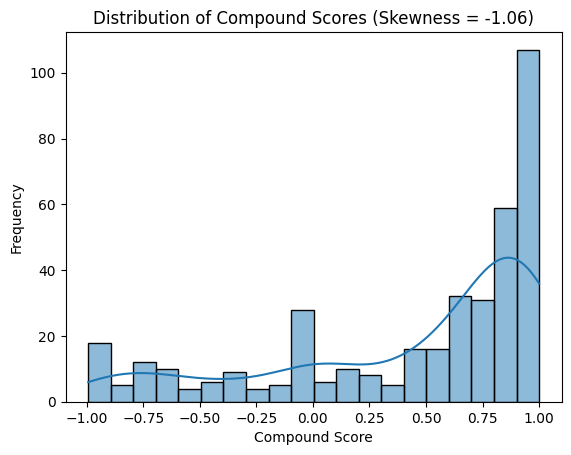

In [ ]:
import seaborn as sns
from scipy.stats import skew
compound_data = review_score['compound']

skewness_value = skew(compound_data)

plt.figure()
sns.histplot(compound_data, bins=20, kde=True, edgecolor='black')
plt.title(f'Distribution of Compound Scores (Skewness = {skewness_value:.2f})')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


**Skewness** has a negative value which means distribution has a long tail on the left side. It's clear in the figure as well that the distribution is left-skewed, meaning there are less negative and more positive sentiment scores.\
The **mode** is the value that appears most frequently in a data set. As shown in the figure there is a sharp peak around 1, which again suggests that there are higher frequency of positive scores. Also, there is a smaller peak around 0, which means the number of neutral scores is also considerable.

---

### Question 4
Compute the mean and median of the score. Discuss which measure is considered more robust given the shape of your distribution.


In [ ]:
description = compound_data.describe()
print(description)

count    391.000000
mean       0.439489
std        0.598307
min       -0.992900
25%        0.000000
50%        0.709600
75%        0.908700
max        0.999400
Name: compound, dtype: float64


Mean =  0.439489\
Median = 0.709600\
standard deviation = 0.598307

Since our data for compound score is skewed to left, we have higher frequency in positive sentiment scores. I think mean gets affected extremely by this skewed data and can not represent the data well. because However median is seems to more robust in this case.  

---

### Question 5
Compute a range, standard deviation, and interquartile range. Discuss which one is a robust measure to describes the variability of your data.


In [ ]:
# [CODE BY YOURSELF]

print(compound_data.max())
print(compound_data.min())
range_compound = compound_data.max() - compound_data.min()
std_compound = compound_data.std()
iqr_compound = compound_data.quantile(0.75) - compound_data.quantile(0.25)
print("Range: ", range_compound)
print("Standard deviation: ", std_compound)
print("Interquartile range: ", iqr_compound)

0.9994
-0.9929
Range:  1.9923
Standard deviation:  0.59830701585194
Interquartile range:  0.9087


We know the data is mostly on the positive side, and as shown in the output of range the variability is very high, which is caused by outliers. The same issue occurs with the standard deviation (since it is also influenced by these extreme values). However, the interquartile range (IQR) seems to be more robust for our skewed data because it focuses on the middle 50% of the data.

---

#### Let's draw a box plot.


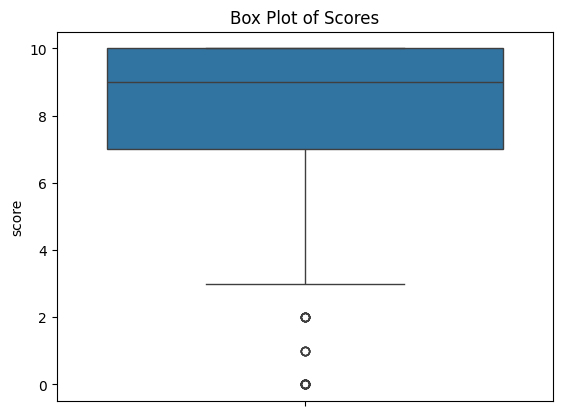

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(y=review_score['score'])
plt.title('Box Plot of Scores')
plt.show()

### Question 6
Can you spot any outliers? Do you have any ideas why these outliers are created? Do you think we should delete them?


Yes.The data points  below 4. \
There can be many possible reasons.
1. Some critics might have higher standards and specified criteria for evaluating the same piece of work (in other word they tend to pay more attention to details) and that leads to lower scores from them. So furthur investigation is needed.
2.  Simply this may happened due to personal reasons, like bias toward specific genre, cast, and etc.
3. Outliers may result from extreme opinions of the reviewers, where a few reviews are extremely negative compared to the majority.
4. Different kinds of Error. (data collection error, user error and so on)

I think keeping these outliers can give us some insight into extreme cases and the variation of people's opinion. However it can make the whole data processing harder since, in some statistical analyses, outliers can skew results and affect the accuracy of the analysis.

Finding the real reason for these outliers can help us decide better whether to delete the data points or not. For example, if many critics give low score maybe there is a problem with the movie so it's better to keep the data points. But If outliers are due to errors, it might be better to remove them to maintain data integrity.


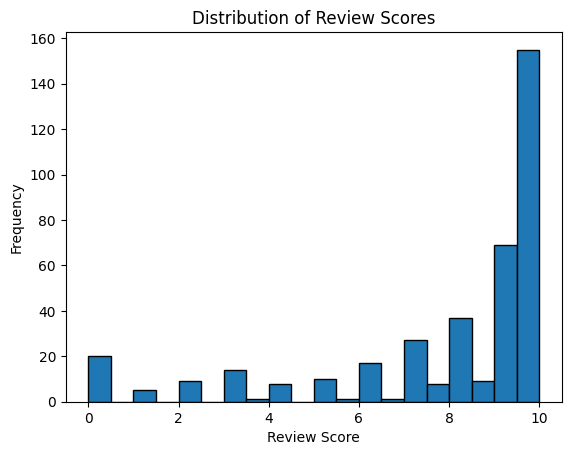

In [ ]:
score_data = review_score['score']
plt.figure()
plt.hist(score_data, bins=20, edgecolor='black')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

---

#### Now we will compare this variable with results from VADER.


### Question 7
Which graphical display we should use to check relationships between two quantitative variables, "score" and "compound"? Show it by coding it.


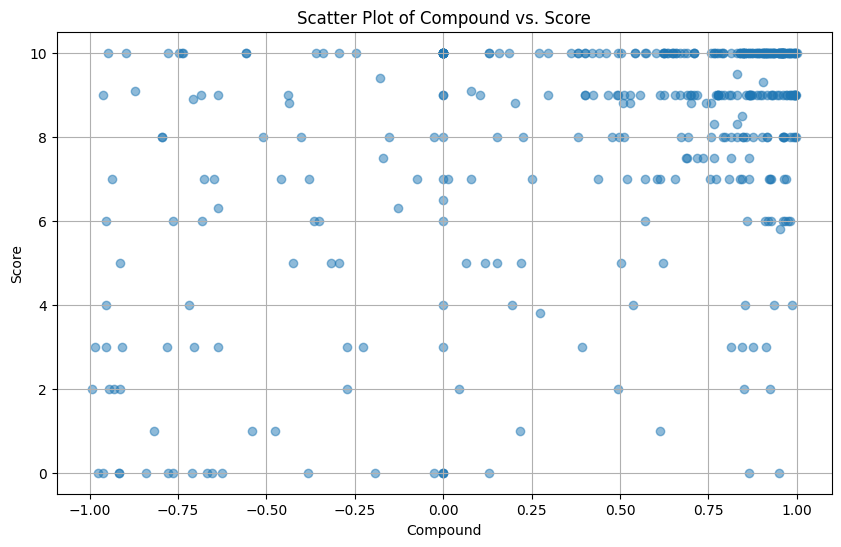

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(compound_data, score_data, alpha=0.5)
plt.title('Scatter Plot of Compound vs. Score')
plt.xlabel('Compound')
plt.ylabel('Score')
plt.grid(True)
plt.show()

---

### Question 8
Can you find any relationships between two variables? If so, is it positive or negative? Is it weak, moderate, or strong?


What does it mean? Explain it in plain English.


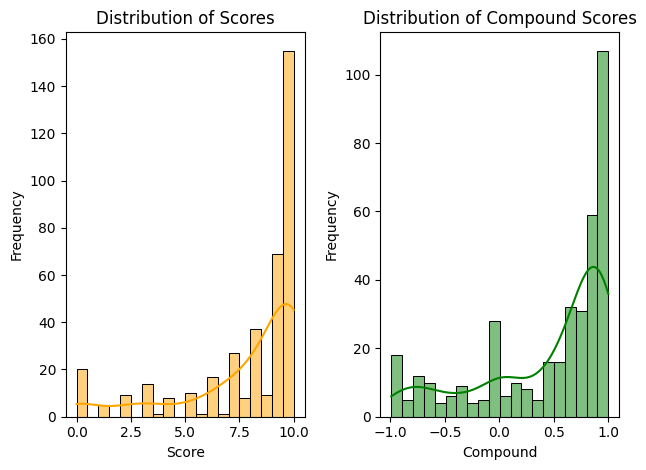

In [ ]:
fig, ax = plt.subplots(1, 2)

# Plot the distribution of 'score'
sns.histplot(review_score['score'], bins=20, kde=True, ax=ax[0], color='orange')
ax[0].set_title('Distribution of Scores')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Frequency')

# Plot the distribution of 'compound'
sns.histplot(review_score['compound'], bins=20, kde=True, ax=ax[1], color='green')
ax[1].set_title('Distribution of Compound Scores')
ax[1].set_xlabel('Compound')
ax[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()





Since both of the variables can be assumed continuous and ordinal, we can use Pearson Correlation Coefficient to measure the linear relationship between two continuous variables, and use Spearman Rank Correlation Coefficient to measure the monotonic relationship between two variables using their ranks.

In [ ]:
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm

pearson_corr, pearson_p_value = pearsonr(score_data, compound_data)
print("Pearson correlation coefficient:", pearson_corr)
print("P-value:", pearson_p_value)

spearman_corr, spearman_p_value = spearmanr(score_data, compound_data)
print("Spearman rank correlation coefficient:", spearman_corr)
print("P-value:", spearman_p_value)




Pearson correlation coefficient: 0.47502271404706276
P-value: 2.113092064521287e-23
Spearman rank correlation coefficient: 0.34697300227613453
P-value: 1.6712131004217737e-12


The Pearson correlation coefficient of 0.475 suggests a moderate positive linear relationship.
The Spearman rank correlation coefficient of 0.347 shows a weaker positive monotonic relationship.
And since for both correlations, the p-value is very small, we can say this correlation is statistically significant.



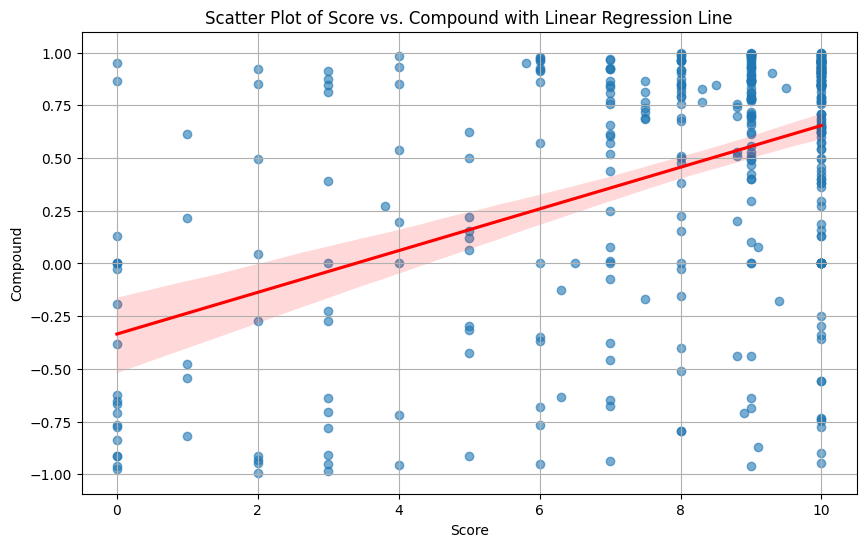

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     113.4
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.11e-23
Time:                        07:30:39   Log-Likelihood:                -303.47
No. Observations:                 391   AIC:                             610.9
Df Residuals:                     389   BIC:                             618.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3350      0.077     -4.324      0.0

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='score', y='compound', data=review_score, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter Plot of Score vs. Compound with Linear Regression Line')
plt.xlabel('Score')
plt.ylabel('Compound')
plt.grid(True)
plt.show()

X = sm.add_constant(score_data)
model = sm.OLS(compound_data, X).fit()
print(model.summary())

R-squared (0.226): This shows a moderate fit.
Coefficient of score (0.0989): For each one-unit increase in the score, the compound score increases by approximately 0.0989 units, assuming other factors remain constant.

P-value (< 0.05): the relationship between score and compound is statistically significant.
Intercept (-0.3350): When the score is zero, the expected value of the compound score is -0.3350.

F-statistic (113.4): The F-statistic and its p-value (2.11e-23) indicate that the overall regression model is statistically significant.
Durbin-Watson (1.930): The Durbin-Watson statistic is close to 2, suggesting that there is no significant autocorrelation in the residuals.

Normality (Omnibus and Jarque-Bera tests): The p-values for these tests are very small, indicating that the residuals may not be normally distributed, which might affect the reliability of the confidence intervals and hypothesis tests.

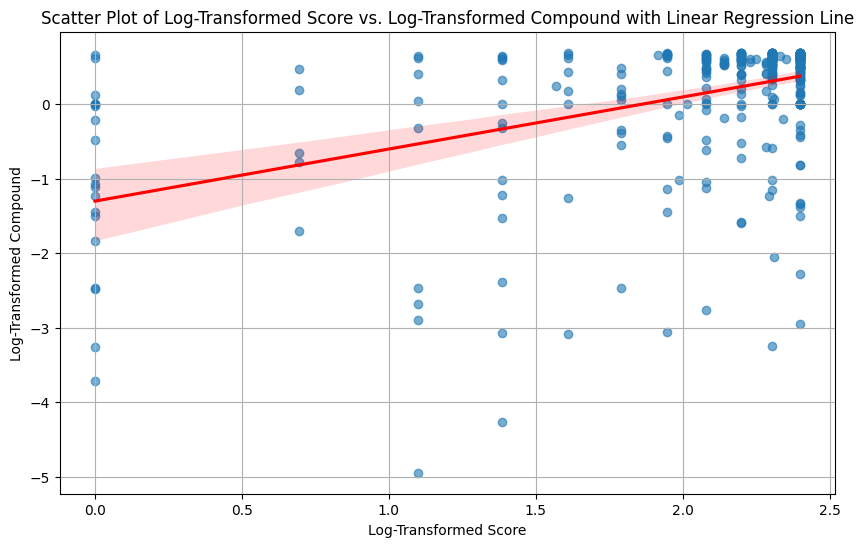

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     102.5
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.54e-21
Time:                        09:08:21   Log-Likelihood:                -467.30
No. Observations:                 391   AIC:                             938.6
Df Residuals:                     389   BIC:                             946.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3001      0.148     -8.762      0.0

In [ ]:

# Compute the logarithm of the score and compound data
log_score = np.log(score_data + 1)  # Adding 1 to avoid log(0) issues
log_compound = np.log(compound_data + 1)  # Adding 1 to avoid log(0) issues

# Create scatter plot with the log-transformed data and linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=log_score, y=log_compound, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter Plot of Log-Transformed Score vs. Log-Transformed Compound with Linear Regression Line')
plt.xlabel('Log-Transformed Score')
plt.ylabel('Log-Transformed Compound')
plt.grid(True)
plt.show()

# Fit the regression model with log-transformed data
X_log = sm.add_constant(log_score)  # Adds a constant term to the predictor
model_log = sm.OLS(log_compound, X_log).fit()  # Fit the regression model
model_log_summary = model_log.summary()

print(model_log_summary)

---

# THE END #